In [ ]:
from google.colab import drive
drive.mount('')

Mounted at /content/drive


In [ ]:
!pip install transformers

In [ ]:
import os
from transformers import (
    BertTokenizer,
    TFBertForSequenceClassification,
)

model_path = ''
tokenizer_path = ''

if not os.path.exists(model_path):
    model =  TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels = 3)
    model.save_pretrained(model_path)
else:
    model = TFBertForSequenceClassification.from_pretrained(model_path)
    
if not os.path.exists(tokenizer_path):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    tokenizer.save_pretrained(tokenizer_path)
else:
    tokenizer = BertTokenizer.from_pretrained(tokenizer_path)        

Some layers from the model checkpoint at /content/drive/MyDrive/2020 WINTER PROJ/saved/model/pre-trained were not used when initializing TFBertForSequenceClassification: ['dropout_75']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /content/drive/MyDrive/2020 WINTER PROJ/saved/model/pre-trained.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without f

In [ ]:
model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  109482240 
_________________________________________________________________
dropout_37 (Dropout)         multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  2307      
Total params: 109,484,547
Trainable params: 109,484,547
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
train = pd.read_csv('')
train = train.dropna()
print('Train data shape: ', train.shape)
train.head()

Train data shape:  (27480, 4)


,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [ ]:
def to_index(text):
    return {
        'negative': 0, 'neutral': 1, 'positive': 2
    }[text]

train['sentiment_i'] = train.sentiment.apply(to_index)

In [ ]:
def to_train_dataset(data, DATA_COLUMN, LABEL_COLUMN, tokenizer, max_length=128):
  '''
  convert df into tf dataset
  '''
  # dict of 2d lists
  tokenized = tokenizer(
      list(data[DATA_COLUMN]),
      add_special_tokens=True,
      max_length=max_length,
      return_token_type_ids=True,
      return_attention_mask=True,
      pad_to_max_length=True,
      truncation=True,
  )

  dicts = [{
    'input_ids': input_ids,
    'attention_mask': attention_mask,
    'token_type_ids': token_type_ids,
    } for input_ids, attention_mask, token_type_ids in zip(tokenized['input_ids'], tokenized['attention_mask'], tokenized['token_type_ids'])]
    
  def gen():
      for d, label in zip(dicts, data[LABEL_COLUMN]):
          yield (d, label)

  return tf.data.Dataset.from_generator(
      gen,
      ({'input_ids': tf.int32, 'attention_mask': tf.int32, 'token_type_ids': tf.int32}, tf.int32),
      (
          {
              'input_ids': tf.TensorShape([None]),
              'attention_mask': tf.TensorShape([None]),
              'token_type_ids': tf.TensorShape([None]),
          },
          tf.TensorShape([]),
      ),
  )

In [ ]:
DATA_COLUMN = 'text'
LABEL_COLUMN = 'sentiment_i'

train, validation = train_test_split(train, test_size = 0.2)

train_data = to_train_dataset(train, DATA_COLUMN, LABEL_COLUMN, tokenizer)
train_data = train_data.shuffle(100).batch(32).repeat(2)

validation_data =to_train_dataset(validation, DATA_COLUMN, LABEL_COLUMN, tokenizer)
validation_data = validation_data.shuffle(100).batch(32).repeat(2)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2155: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

model.fit(train_data, epochs=2, validation_data=validation_data)

model.save_pretrained('')

Epoch 1/2
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autogr

Make Predictions

In [ ]:
from google.colab import drive
drive.mount('')

Mounted at /content/drive


In [ ]:
!pip install transformers

     |████████████████████████████████| 1.8MB 19.4MB/s 
     |████████████████████████████████| 890kB 52.2MB/s 
     |████████████████████████████████| 3.2MB 50.5MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=158ae8d34ebb402a710a5cff655f2c02b961b4b58188d4e0ebf289d2e0997120
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from transformers import (
    BertTokenizer, 
    TFBertForSequenceClassification,
)

model_path = ''
tokenizer_path = ''

model = TFBertForSequenceClassification.from_pretrained(model_path)
tokenizer = BertTokenizer.from_pretrained(tokenizer_path)

Some layers from the model checkpoint at /content/drive/MyDrive/2020 WINTER PROJ/saved/model/fine-tuned were not used when initializing TFBertForSequenceClassification: ['dropout_113']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /content/drive/MyDrive/2020 WINTER PROJ/saved/model/fine-tuned.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without fu

In [ ]:
test = pd.read_csv('')
test = test.dropna()
print('Test data shape: ', test.shape)
test.head()

Test data shape:  (3534, 3)


,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


In [ ]:
def to_dataset(data, DATA_COLUMN, tokenizer, max_length=128):
  '''
  convert df into tf dataset
  '''
  # dict of 2d lists
  tokenized = tokenizer(
      list(data[DATA_COLUMN]),
      add_special_tokens=True,
      max_length=max_length,
      return_token_type_ids=True,
      return_attention_mask=True,
      pad_to_max_length=True,
      truncation=True,
  )

  dicts = [{
    'input_ids': input_ids,
    'attention_mask': attention_mask,
    'token_type_ids': token_type_ids,
    } for input_ids, attention_mask, token_type_ids in zip(tokenized['input_ids'], tokenized['attention_mask'], tokenized['token_type_ids'])]

  def gen():
    for d in dicts:
      yield(d)

  return tf.data.Dataset.from_generator(
      gen,
      {'input_ids': tf.int32, 'attention_mask': tf.int32, 'token_type_ids': tf.int32},
      {
          'input_ids': tf.TensorShape([None]),
       'attention_mask': tf.TensorShape([None]),
       'token_type_ids': tf.TensorShape([None]),
       },
  )

In [ ]:
DATA_COLUMN = 'text'

test_data = to_dataset(test, DATA_COLUMN, tokenizer)
test_data = test_data.batch(32)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2155: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
outputs = model.predict(test_data)

In [ ]:
probs = tf.nn.softmax(outputs[0], axis=-1)
indices = tf.argmax(probs, axis=1)
labels = np.array(['negative', 'neutral', 'positive'])
prediction = labels[indices]

In [ ]:
result = pd.DataFrame()
result['text'] = test['text']
result['sentiment'] = prediction
result.to_csv('', index=False)

In [ ]:
print(result)

                                                   text sentiment
0     Last session of the day  http://twitpic.com/67ezh   neutral
1      Shanghai is also really exciting (precisely -...  positive
2     Recession hit Veronique Branquinho, she has to...  negative
3                                           happy bday!  positive
4                http://twitpic.com/4w75p - I like it!!  positive
...                                                 ...       ...
3529  its at 3 am, im very tired but i can`t sleep  ...  negative
3530  All alone in this old house again.  Thanks for...  positive
3531   I know what you mean. My little dog is sinkin...  negative
3532  _sutra what is your next youtube video gonna b...  positive
3533   http://twitpic.com/4woj2 - omgssh  ang cute n...  positive

[3534 rows x 2 columns]


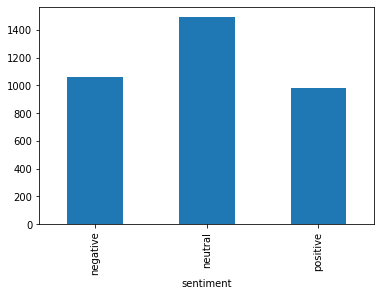

In [ ]:
result.groupby('sentiment').size().plot(kind='bar')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(prediction, test['sentiment'])
print(f'accuracy: {accuracy*100:.2f}%')

accuracy: 77.82%
